In [1]:
from features.explainability.monkey_patching import patch_shap, patch_lime
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # Some tensorflow warnings in the pipeline we inspect
from mlinspect.utils import get_project_root

from mlinspect import PipelineInspector

EXAMPLE_PIPELINE = os.path.join(str(get_project_root()), "features", "explainability", "pipeline_with_dag.py")

inspector_result = PipelineInspector\
    .on_pipeline_from_py_file(EXAMPLE_PIPELINE) \
    .add_custom_monkey_patching_module(patch_shap) \
    .add_custom_monkey_patching_module(patch_lime) \
    .execute()

extracted_dag = inspector_result.dag
dag_node_to_inspection_results = inspector_result.dag_node_to_inspection_results
check_results = inspector_result.check_to_check_results

Mean accuracy: 0.9041095890410958
explain instance
predict proba
after result


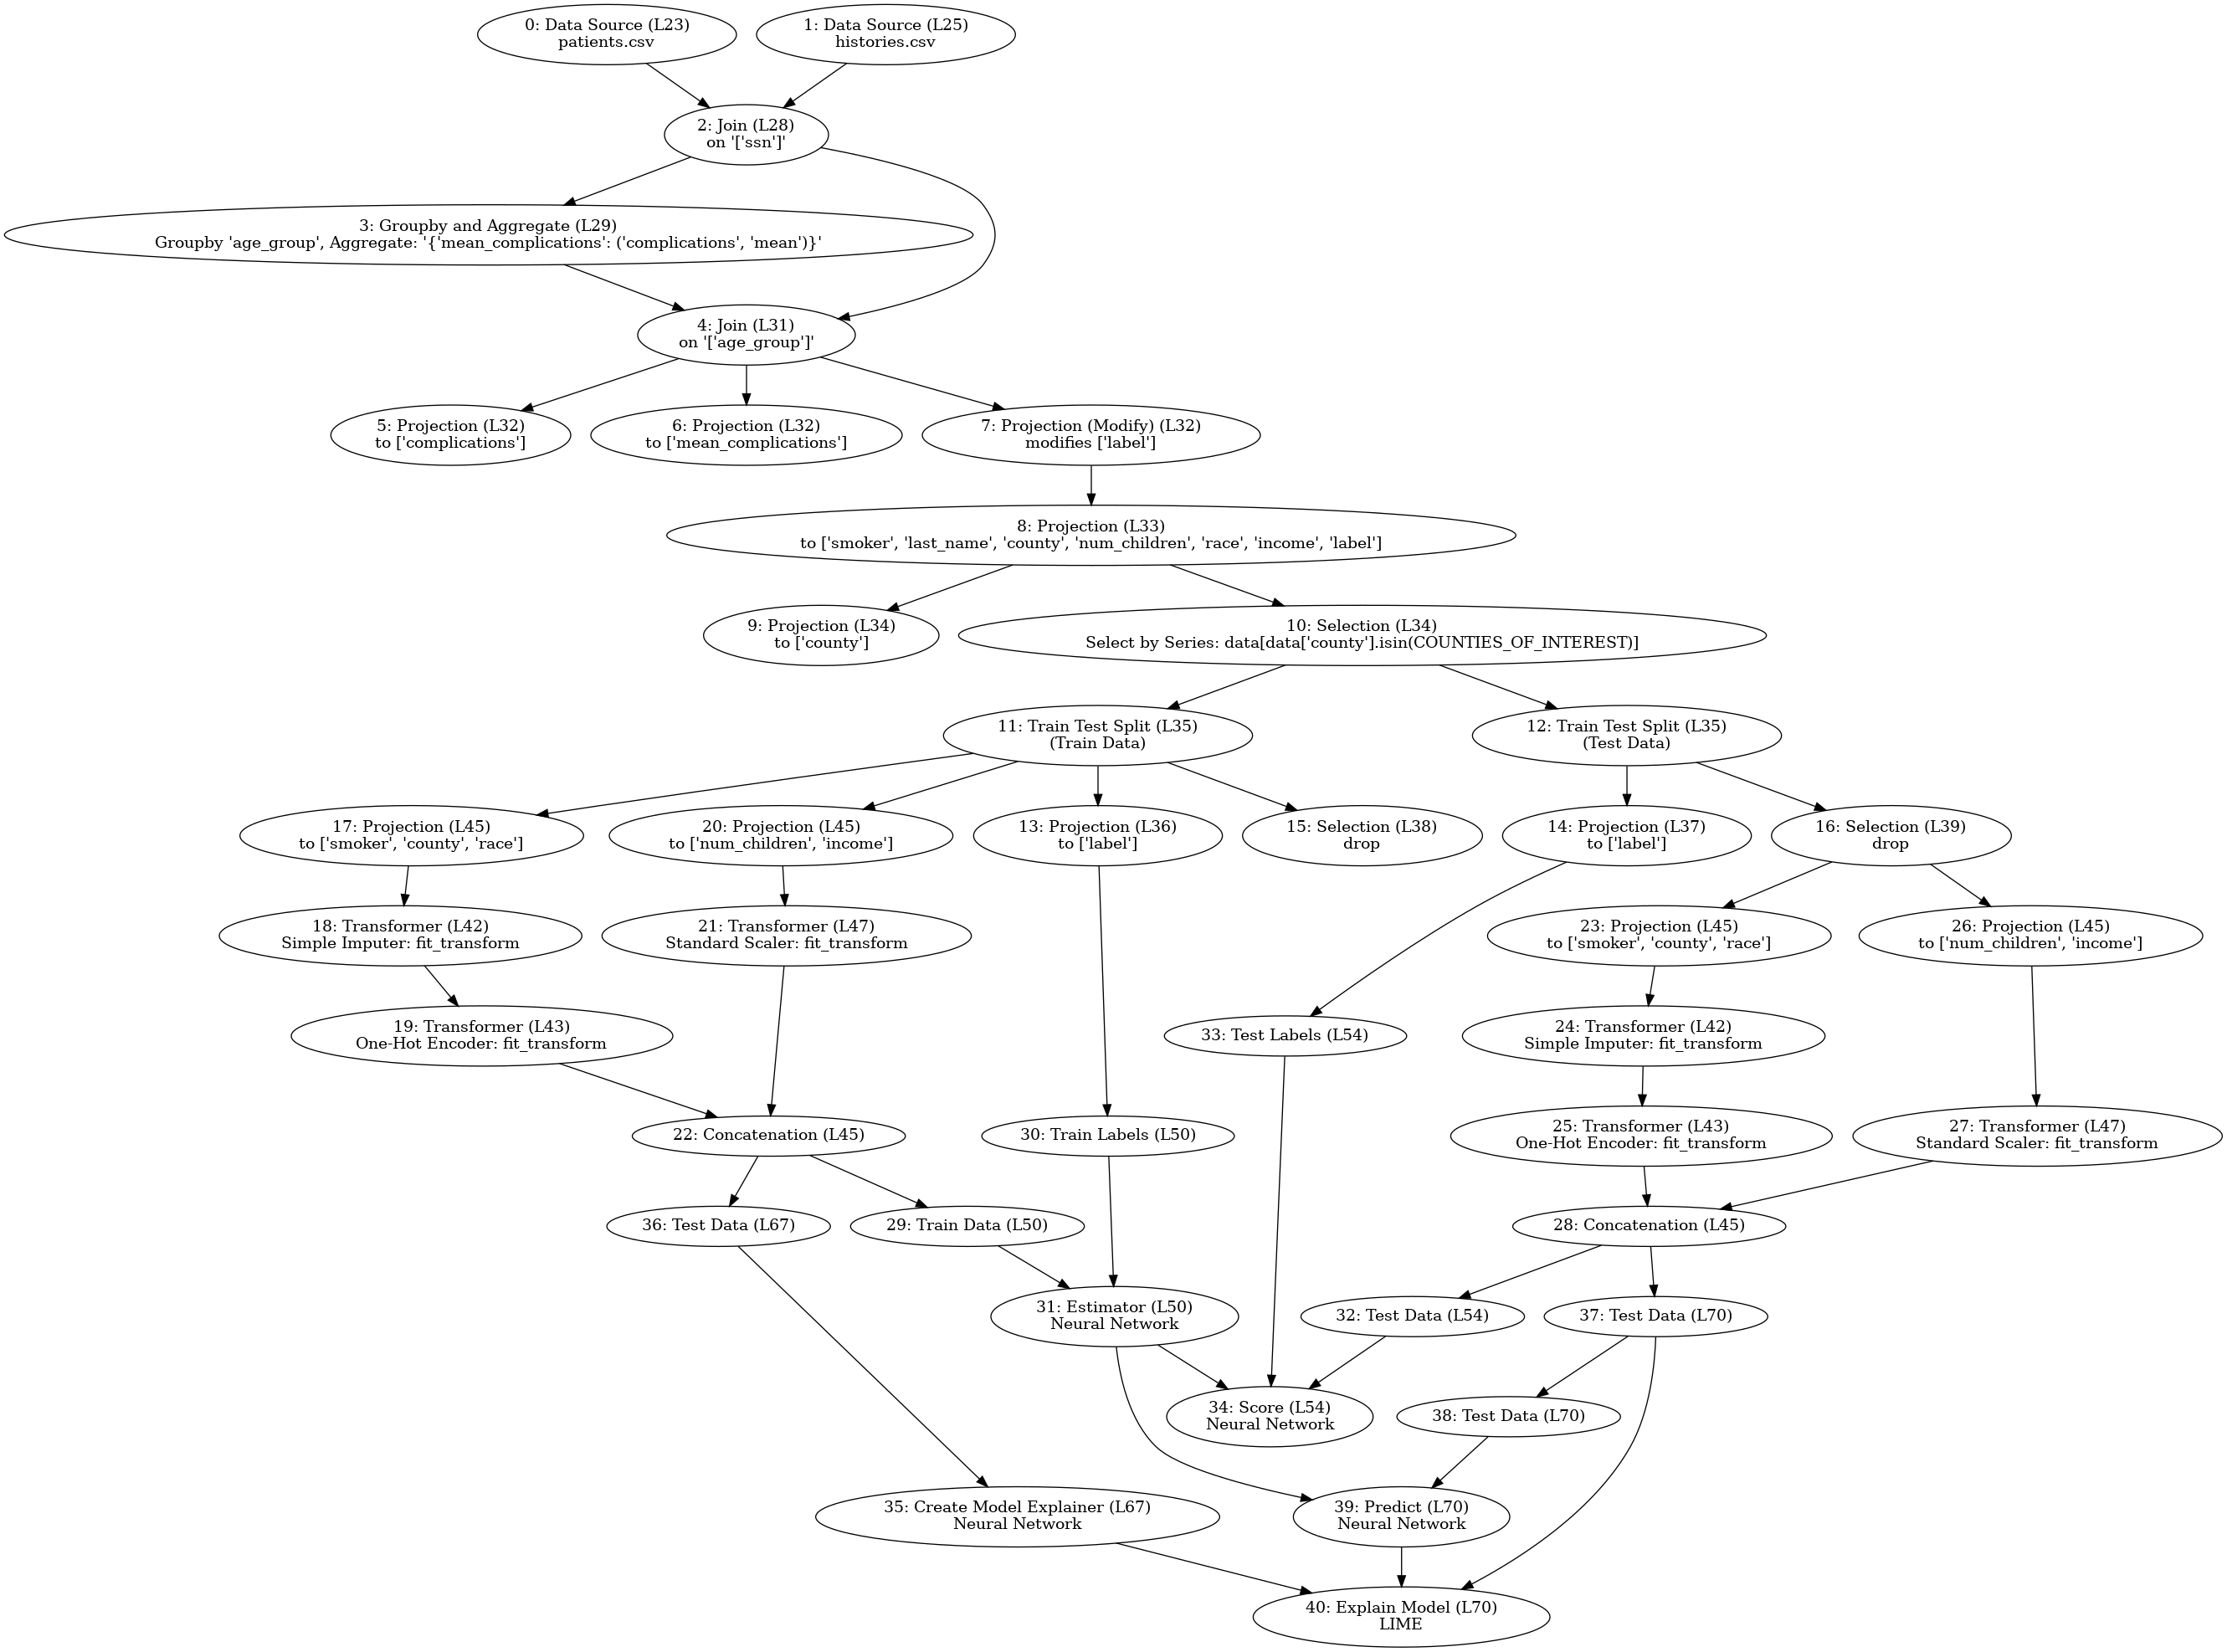

In [2]:
from IPython.display import Image
from mlinspect.visualisation import save_fig_to_path

filename = os.path.join(str(get_project_root()), "features", "explainability", "explainability.png")
save_fig_to_path(extracted_dag, filename)

Image(filename=filename)